In [833]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(color_codes=True)
sns.set_style('darkgrid')
# sns.set_style('whitegrid')
%matplotlib inline

In [834]:
# Reading the CSV data file
file = 'Data\Data_23032020.csv'
raw_data = pd.read_csv(file)

In [835]:
#  Takes the names of Brazilian states ant the counting days per state
states = []
days_per_state = []
region_label = []
t = 0

for i in np.arange(0, len(raw_data['state']) - 1):
    
    if raw_data['state'][i] != raw_data['state'][i + 1]:
        states = states + [raw_data['state'].iloc[i]]
        region_label = region_label + [raw_data['region'].iloc[i]]
        days_per_state = days_per_state + [t]
        t = 0
#     if raw_data['region'][i] != raw_data['region'][i + 1]:
#         region_label = region_label + [raw_data['region'].iloc[i]]
        
    t += 1

In [836]:
# Creates the structure of the dataframe to be plotted
total_cases = np.empty((len(states), np.max(days_per_state) - 1))
total_cases[:] = np.NaN
new_cases = np.empty((len(states), np.max(days_per_state) - 1))
new_cases[:] = np.NaN

row = 0
col = 0

for i in np.arange(0, len(raw_data['state']) - 1):
    if row < len(states):
        total_cases[row, col] = raw_data['totalCases'][i]
        new_cases[row, col] = raw_data['newCases'][i]
        col += 1
    else:
        pass
    if raw_data['state'][i] != raw_data['state'][i + 1]:
        col = 0
        row += 1
        
new_data = pd.DataFrame(data = new_cases, index = states)
total_data = pd.DataFrame(data = total_cases, index = states)

regions = pd.DataFrame(region_label, columns = ['Region'], index = states)
new_data = new_data.join(regions);
total_data = total_data.join(regions)

IndexError: index 21 is out of bounds for axis 1 with size 21

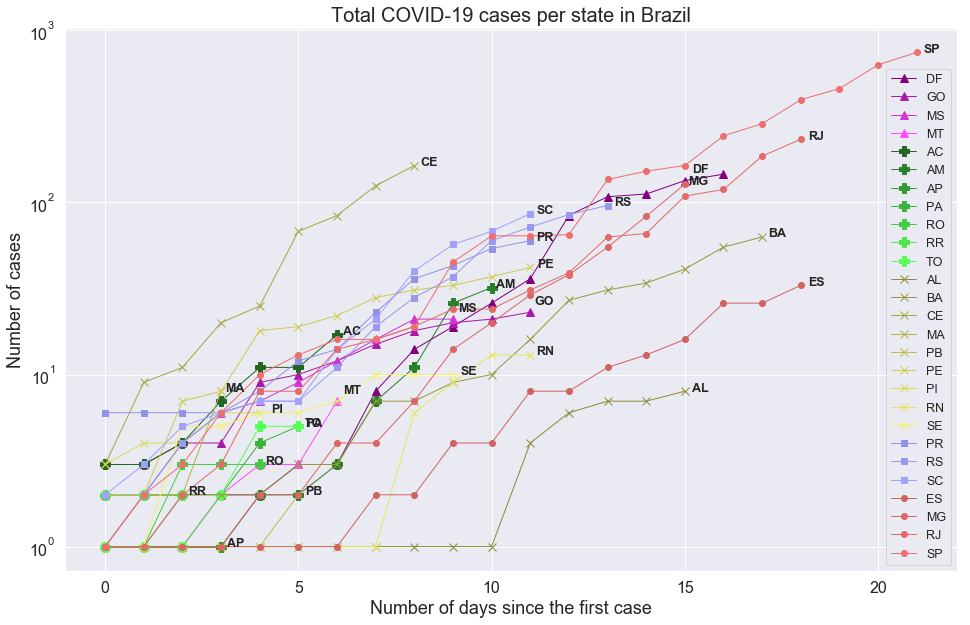

In [991]:
# Plotting the total number per state

plt.figure(figsize = (16, 10))

for k in range(0, len(states)):
    if total_data['Region'][k] == 'Central':
        color_central = ((k+3)/6, k/10, (k+3)/6)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-^', color = color_central, 
                 markersize = 8, linewidth = 1) 
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 8), ha='right', fontsize = 12.5, weight = 'bold')
    
    if total_data['Region'][k] == 'North':
        color_north = (k/30, k/10, k/30)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-P', color = color_north, 
                 markersize = 10, linewidth = 1)
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 0), ha='right', fontsize = 12.5, weight = 'bold')
        
    if total_data['Region'][k] == 'Northeast':
        color_northeast = (k/20, k/20, k/50)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-x', color = color_northeast, 
                 markersize = 8, linewidth = 1)
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 0), ha='right', fontsize = 12.5, weight = 'bold')
        
    if total_data['Region'][k] == 'South':
        color_south = (k/35, k/35, k/22)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-s', color = color_south, 
                 markersize = 6, linewidth = 1)
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 0), ha='right', fontsize = 12.5, weight = 'bold')
        
    if total_data['Region'][k] == 'Southeast':
        color_southeast = (k/28, k/60, k/60)
        plt.plot(total_data.iloc[k, range(0, total_data.shape[1] - 1)], '-o', color = color_southeast,
                 markersize = 6, linewidth = 1)
        plt.annotate(total_data.index[k], (days_per_state[k], total_data.iloc[k, days_per_state[k] - 1]), 
                    textcoords = 'offset points', xytext=(-15, 0), ha='right', fontsize = 12.5, weight = 'bold')

plt.yscale('log')
plt.ylabel('Number of cases', Fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Number of days since the first case', Fontsize = 18)
plt.xticks(fontsize = 16)
plt.title('Total COVID-19 cases per state in Brazil', FontSize = 20)
plt.legend(fontsize = 12.5)

plt.show()

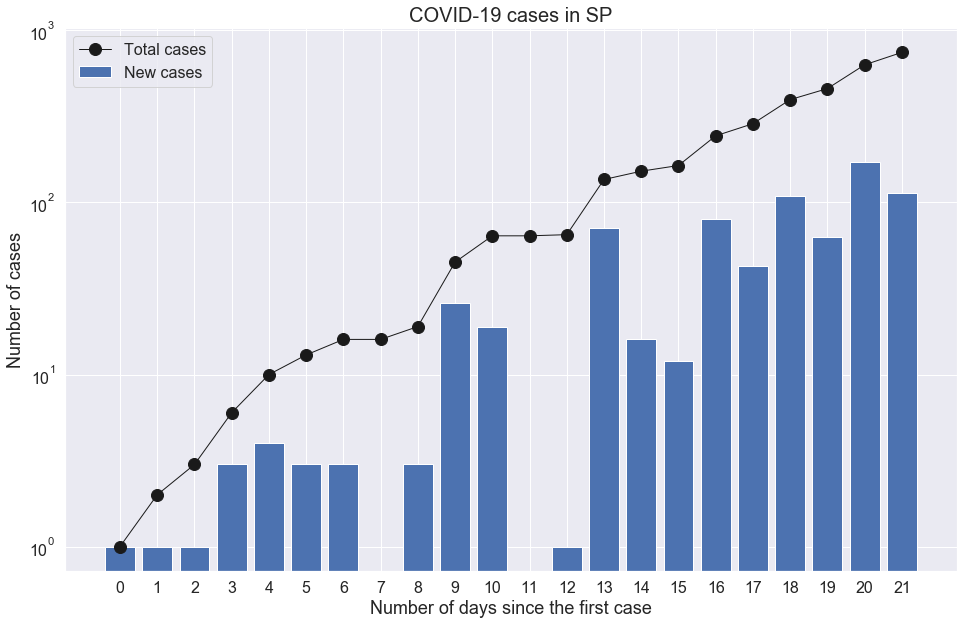

In [990]:
# Analysing just one chosen state

int_state = 'SP' # Choose the state here

for k in range(0, len(total_data.index)):
    if total_data.index[k] == int_state:
        total_state = total_data.iloc[k, :]
        total_state = total_state.drop(labels = 'Region')
        new_state = new_data.iloc[k, :]
        new_state = new_state.drop(labels = 'Region')
        break
        
plt.figure(figsize = (16, 10))

plt.plot(total_state, 'ko-', label = 'Total cases', linewidth = 1, markersize = 12)
plt.bar(np.arange(0, days_per_state[k] + 1, 1), new_state[np.arange(0, days_per_state[k] + 1)], 
        width = .8, color = 'b', label = 'New cases')

plt.yscale('log')
plt.ylabel('Number of cases', Fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Number of days since the first case', Fontsize = 18)
plt.xticks(np.arange(0, days_per_state[k]), fontsize = 16)
plt.title('COVID-19 cases in ' + int_state, FontSize = 20)
plt.legend(fontsize = 16)

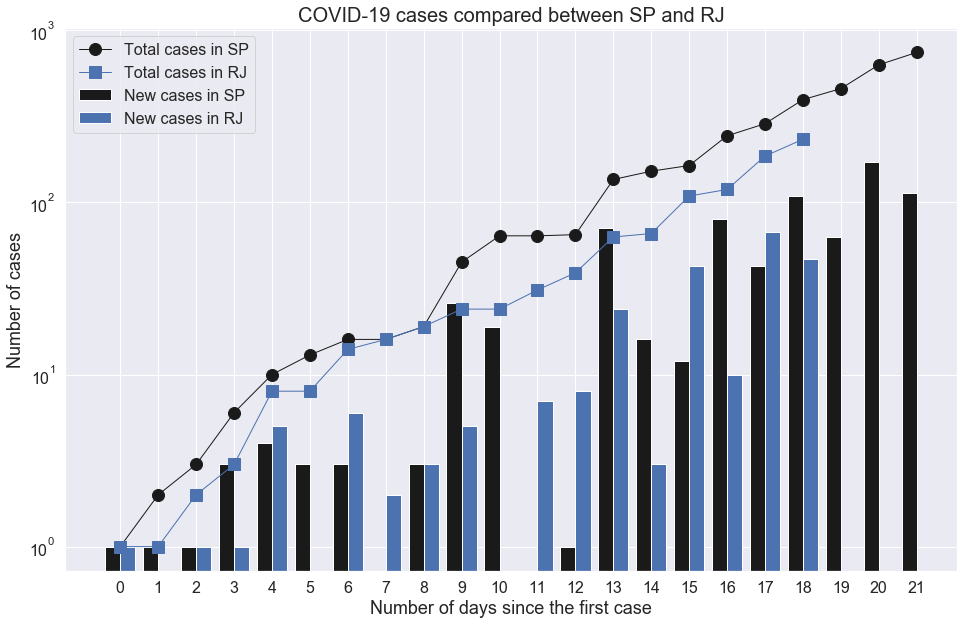

In [989]:
# Comparing states

int_state1 = 'SP' # Choose the state1 here
int_state2 = 'RJ' # Choose the state2 here

for k in range(0, len(total_data.index)):
    if total_data.index[k] == int_state1:
        total_state1 = total_data.iloc[k, :]
        total_state1 = total_state1.drop(labels = 'Region')
        new_state1 = new_data.iloc[k, :]
        new_state1 = new_state1.drop(labels = 'Region')
        n1 = k
    if total_data.index[k] == int_state2:
        total_state2 = total_data.iloc[k, :]
        total_state2 = total_state2.drop(labels = 'Region')
        new_state2 = new_data.iloc[k, :]
        new_state2 = new_state2.drop(labels = 'Region')
        n2 = k

x1 = np.arange(0, days_per_state[n1] + 1, 1)
x2 = np.arange(0, days_per_state[n2] + 1, 1)

plt.figure(figsize = (16, 10))

w = .2

plt.plot(total_state1, 'ko-', label = 'Total cases in ' + int_state1, linewidth = 1, markersize = 12)
plt.plot(total_state2, 'bs-', label = 'Total cases in ' + int_state2, linewidth = 1, markersize = 12)
plt.bar(x1 - w, new_state1[np.arange(0, days_per_state[n1] + 1)], width = .4, color = 'k', 
        label = 'New cases in ' + int_state1)
plt.bar(x2  + w, new_state2[np.arange(0, days_per_state[n2] + 1)], width = .4, color = 'b', 
        label = 'New cases in ' + int_state2)

plt.yscale('log')
plt.ylabel('Number of cases', Fontsize = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Number of days since the first case', Fontsize = 18)
plt.xticks(np.arange(0, days_per_state[k]), fontsize = 16)
plt.title('COVID-19 cases compared between ' + int_state1 + ' and ' + int_state2, FontSize = 20)
plt.legend(fontsize = 16)